In [945]:
from itertools import cycle, islice
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [946]:
n_samples = 500
seed = 30

rng = np.random.RandomState(seed)

In [947]:
clusters_path = Path("./clusters")
clusters_path.mkdir(exist_ok=True)

In [948]:
clusters_2d_path = clusters_path / "2D"
clusters_2d_path.mkdir(exist_ok=True)

In [949]:
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [950]:
default_base = {
    "eps": 0.3
}

dataset_results = {
    "noisy_circles": (noisy_circles, { }),
    "noisy_moons": (noisy_moons, { }),
    "varied": (varied,
        {
            "eps": 0.18,
        },
    ),
    "aniso": (
        aniso,
        {
            "eps": 0.15,
        },
    ),
    "blobs": (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    "no_structure": (no_structure, {}),
}

In [951]:
results = {}

for name, (dataset, algo_params) in dataset_results.items():
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    X = StandardScaler().fit_transform(X)

    dbscan = cluster.DBSCAN(eps=params["eps"])
    dbscan.fit(X)

    y_pred = dbscan.labels_.astype(int)
    results[name] = y_pred

    np.savez_compressed(clusters_2d_path / name, X=X, y=y, dbscan=y_pred)

In [952]:
dataset_to_display = "noisy_circles"

(X, y), _ = dataset_results[dataset_to_display]
y_pred = results[dataset_to_display]

In [953]:
colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

In [954]:
y_pred_mask = y_pred.astype(float) / 2

y_pred_mask

array([0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0. ,
       0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0.5,
       0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ,
       0. , 0.5, 0. , 0. , 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0.5,
       0. , 0. , 0.5, 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0.5, 0.5, 0. ,
       0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5,
       0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. ,
       0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5,
       0.5, 0.5, 0.5, 0.5, 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5,
       0.5, 0.5, 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0.5, 0.5, 0. ,
       0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0. , 0.5, 0. ,
       0.5, 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0. , 0.

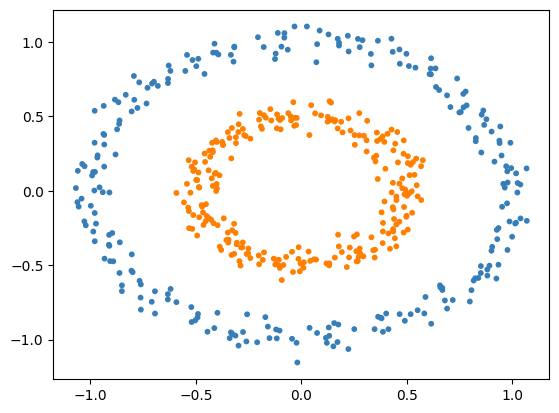

In [955]:
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

In [956]:
y_pred = np.load("./y_pred.npz")["y_pred"]
y_pred + y_pred_mask

array([0. , 0. , 0. , 3.5, 0. , 0. , 3.5, 3.5, 3.5, 0. , 3.5, 3.5, 0. ,
       0. , 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 3.5, 0. , 3.5, 0. , 3.5,
       3.5, 3.5, 3.5, 3.5, 0. , 0. , 0. , 0. , 0. , 3.5, 3.5, 0. , 0. ,
       0. , 3.5, 0. , 0. , 3.5, 3.5, 3.5, 0. , 0. , 0. , 0. , 0. , 3.5,
       0. , 0. , 3.5, 3.5, 0. , 3.5, 3.5, 3.5, 0. , 3.5, 3.5, 0. , 3.5,
       0. , 0. , 3.5, 0. , 3.5, 3.5, 0. , 0. , 3.5, 0. , 3.5, 3.5, 0. ,
       3.5, 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 3.5, 3.5,
       3.5, 0. , 3.5, 0. , 0. , 0. , 0. , 3.5, 0. , 3.5, 3.5, 3.5, 0. ,
       3.5, 0. , 3.5, 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 3.5, 3.5, 0. , 3.5, 0. , 0. , 3.5, 0. , 0. , 0. , 3.5,
       3.5, 3.5, 3.5, 3.5, 0. , 0. , 3.5, 0. , 3.5, 3.5, 3.5, 0. , 3.5,
       3.5, 3.5, 0. , 0. , 0. , 3.5, 3.5, 0. , 0. , 3.5, 3.5, 3.5, 0. ,
       3.5, 3.5, 3.5, 0. , 3.5, 3.5, 3.5, 3.5, 0. , 3.5, 0. , 3.5, 0. ,
       3.5, 0. , 0. , 0. , 3.5, 0. , 3.5, 3.5, 3.5, 0. , 0. , 0.

In [957]:
y_pred_map = list({i for i in y_pred})

y_pred_map

[np.uint32(0), np.uint32(3)]

In [958]:
y_pred = np.array([y_pred_map.index(i) for i in y_pred])
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [959]:
colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y_pred) + 1),
        )
    )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

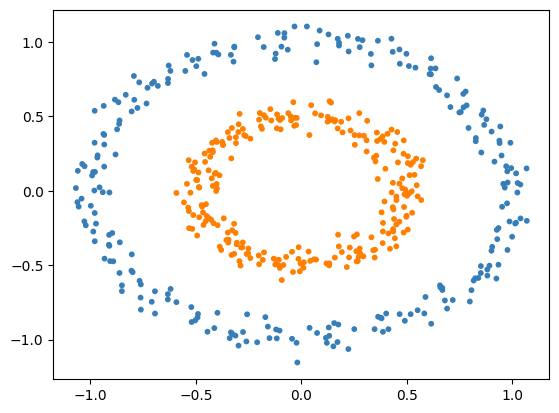

In [960]:
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()